In [1]:
import pandas
from matplotlib import pyplot
import numpy as np
import seaborn


In [6]:
# Personal notes from covtype.info, about this dataframe...
# There are 12 measures, but 54 columns in the dataframe.
# 10 are quantitative variables (numerical)
# 4 are binary wilderness areas (can these overlap?)
# 40 binary soil type variables (can these overlap?)

df = pandas.read_csv('covtype.data', header=None)

In [20]:
# reverse engineering properties regarding the soil.
wilderness_type_count = df.iloc[:,10:10+4].sum(axis=1) # sum by column to count binary 1s.
print("Are wilderness types one-hot encoded (mutually exclusive)?")
print( all( wilderness_type_count==1 ) )# is every single entry a 1?

# What about the soil type?
print("Are soil types one-hot encoded (mutually exclusive)?")
soil_type_count = df.iloc[:,14:].sum(axis=1) # sum by column to count binary 1s.
print( all( soil_type_count==1 ) )# is every single entry a 1?



Are wilderness types one-hot encoded (mutually exclusive)?
True
Are soil types one-hot encoded (mutually exclusive)?
False


2 8


<AxesSubplot:ylabel='Count'>

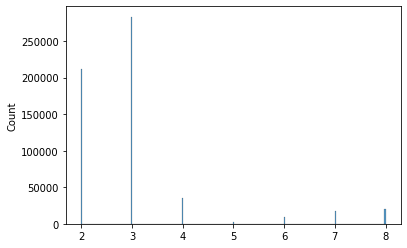

In [22]:
# What do soil types look like across all observations?
# For instance, do we expect 3 soil types for every row? Or, how are they distributed?
print( soil_type_count.min(),soil_type_count.max() )
seaborn.histplot(soil_type_count)

In [36]:
# so, we're seeing the large majority of samples have 2-3 soil types;
# levels off (but not by orders of magnitude) from 4-8 possible soil types.

# How are wilderness types and soil types associated (in a naive way)
# simply by counting overlaps?
wilderness_type = df.iloc[:, 10:10+4]
soil_type = df.iloc[:, 14:]

wilderness_soil_count = soil_type.T.dot(wilderness_type)

# sort by decreasing sum of prevalence (heuristic)
wilderness_soil_count = wilderness_soil_count.iloc[np.argsort(-wilderness_soil_count.sum(axis=1))];

Text(129.91902439024395, 0.5, 'Soil type')

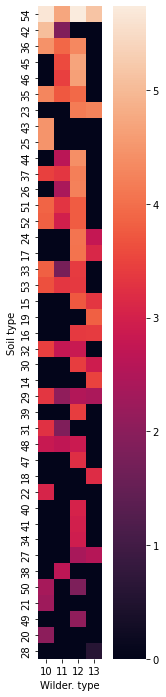

In [40]:
# TODO: attach human readable column names. 
# wilderness types 10-14 shown as column labels;
# soil types 14-54 shown as row labels.
fig,ax = pyplot.subplots(1,1, figsize=(4,12))
seaborn.heatmap(np.log10(1 + wilderness_soil_count), ax=ax, square=True)
ax.set_xlabel('Wilder. type')
ax.set_ylabel('Soil type')